<a href="https://colab.research.google.com/github/shreyanshrao/olympics/blob/main/olympics%20update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Summer-Olympic-medals-1976-to-2008.csv", encoding='latin-1')

In [ ]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [ ]:
df.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [ ]:
print(df.isnull().sum())



City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64


In [ ]:
# Check for missing values

# Drop rows with too many missing values
df.dropna(thresh=3, inplace=True)




In [ ]:
print("Shape:", df.shape)
print(df.info())

Shape: (15316, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None


In [ ]:
country_medals = df.groupby("Country")["Medal"].sum().sort_values(ascending=False)
print(country_medals.head(10))


Country
Paraguay      SilverSilverSilverSilverSilverSilverSilverSilv...
Serbia        SilverSilverSilverSilverSilverSilverSilverSilv...
Peru          SilverSilverSilverSilverSilverSilverSilverSilv...
Yugoslavia    SilverSilverSilverSilverSilverSilverSilverSilv...
Croatia       SilverSilverSilverSilverSilverSilverSilverSilv...
Spain         SilverSilverSilverSilverSilverSilverBronzeSilv...
Poland        SilverSilverSilverSilverGoldSilverGoldGoldBron...
Indonesia     SilverSilverSilverSilverGoldSilverBronzeSilver...
Namibia                                SilverSilverSilverSilver
Norway        SilverSilverSilverGoldGoldSilverSilverBronzeBr...
Name: Medal, dtype: object


/tmp/ipython-input-18-595348525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_medals.head(10).index, y=country_medals.head(10).values, palette="plasma")


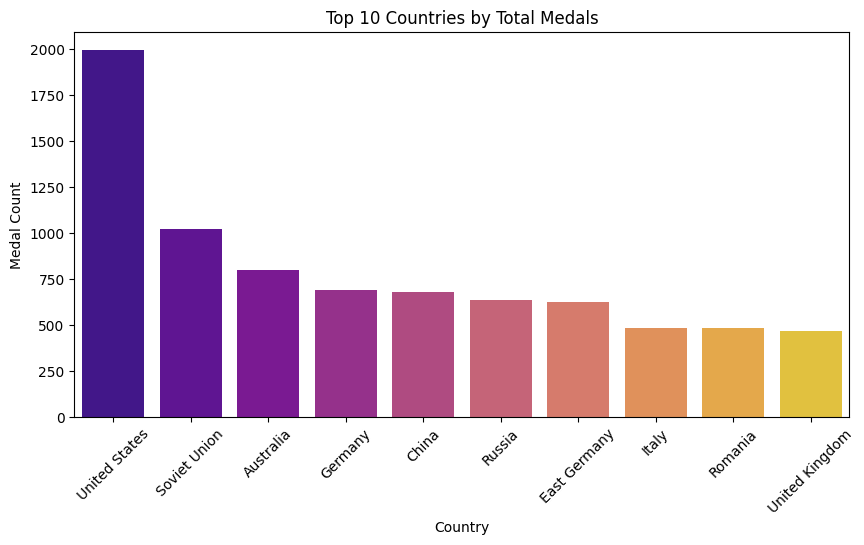

In [ ]:
country_medals = df['Country'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=country_medals.head(10).index, y=country_medals.head(10).values, palette="plasma")
plt.title("Top 10 Countries by Total Medals")
plt.xticks(rotation=45)
plt.ylabel("Medal Count")
plt.show()


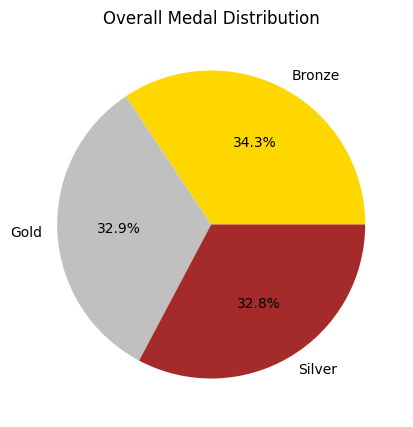

In [ ]:
medal_type = df['Medal'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(medal_type, labels=medal_type.index, autopct='%1.1f%%', colors=['gold','silver','brown'])
plt.title("Overall Medal Distribution")
plt.show()

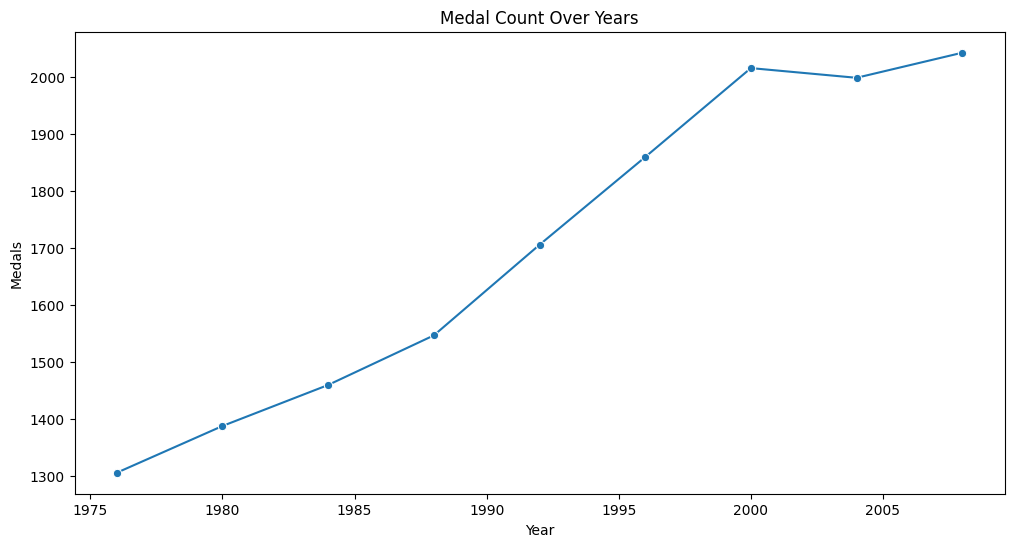

In [ ]:
medals_year = df.groupby("Year")['Medal'].count()
plt.figure(figsize=(12,6))
sns.lineplot(x=medals_year.index, y=medals_year.values, marker='o')
plt.title("Medal Count Over Years")
plt.ylabel("Medals")
plt.show()

/tmp/ipython-input-21-2698477422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette="coolwarm")


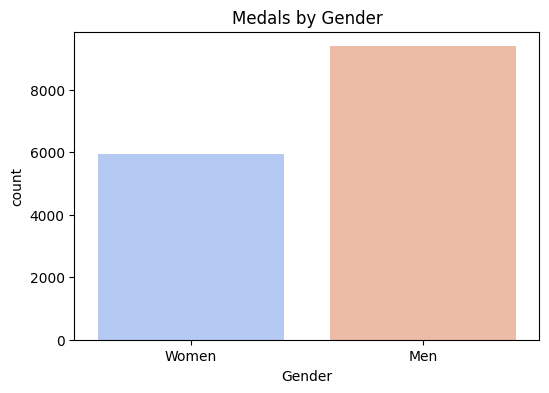

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette="coolwarm")
plt.title("Medals by Gender")
plt.show()

/tmp/ipython-input-22-2570036175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sport_medals.head(10).index, y=sport_medals.head(10).values, palette="viridis")


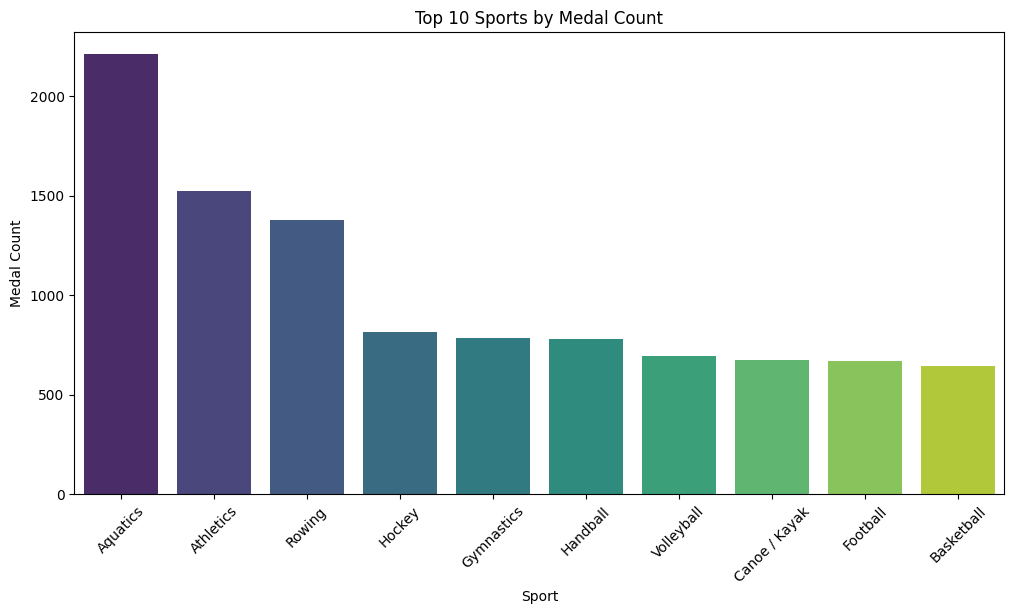

In [ ]:
sport_medals = df['Sport'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=sport_medals.head(10).index, y=sport_medals.head(10).values, palette="viridis")
plt.title("Top 10 Sports by Medal Count")
plt.xticks(rotation=45)
plt.ylabel("Medal Count")
plt.show()

/tmp/ipython-input-23-3862107234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_athletes.index, y=top_athletes.values, palette="magma")


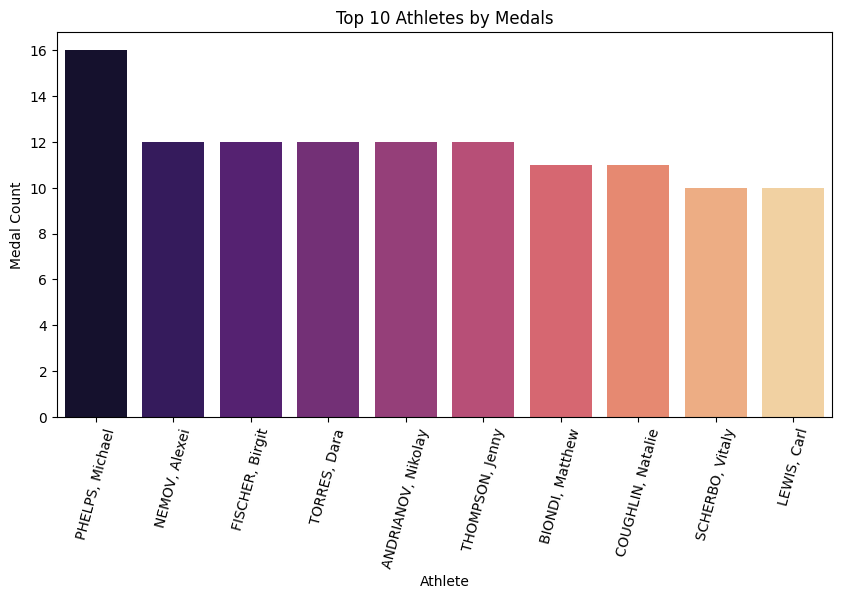

In [ ]:
top_athletes = df['Athlete'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_athletes.index, y=top_athletes.values, palette="magma")
plt.title("Top 10 Athletes by Medals")
plt.xticks(rotation=75)
plt.ylabel("Medal Count")
plt.show()

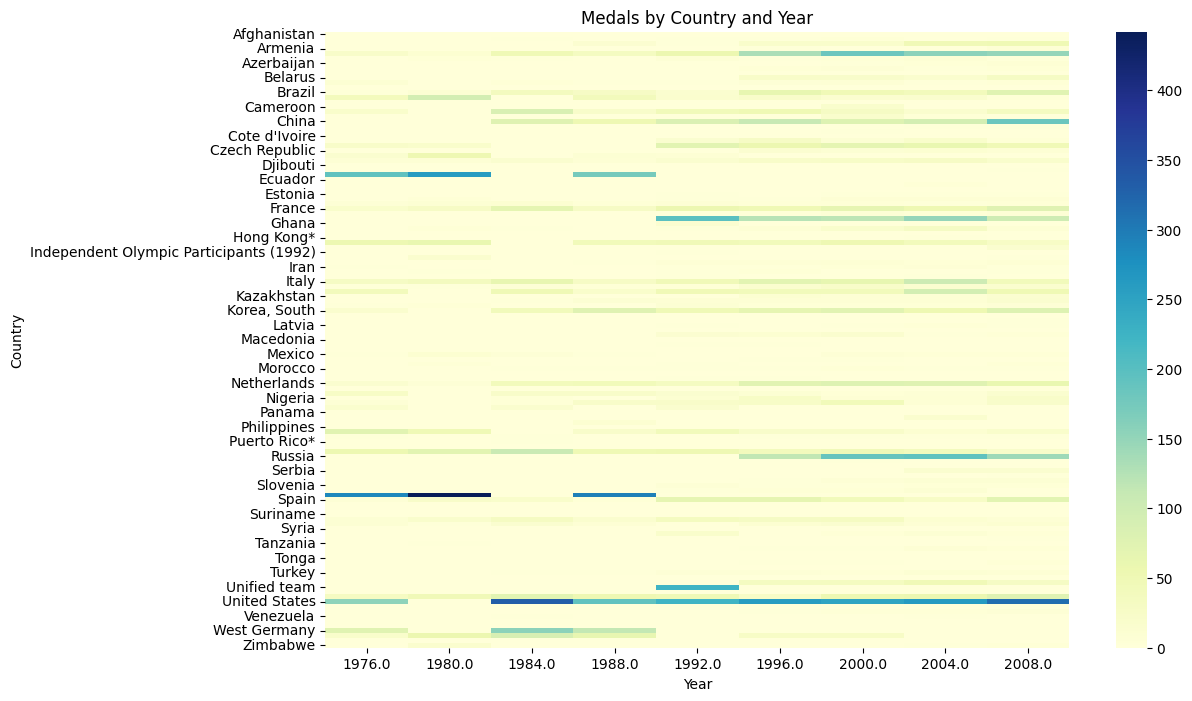

In [ ]:
pivot_table = df.pivot_table(index='Country', columns='Year', values='Medal', aggfunc='count').fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title("Medals by Country and Year")
plt.show()